In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
url = "https://raw.githubusercontent.com/defneerencan/defneerencan-Defne-Erencan-DSA210/main/akbank_clean_categorized_v3.csv"

df = pd.read_csv(url)
df.head()


,date,amount,balance,category
0,2024-09-26,-350.00,2802.86,Restaurant
1,2024-09-26,-338.02,2160.41,Food Delivery
2,2024-09-26,-300.00,2502.86,Bank Transfer
3,2024-09-26,-4.22,2498.64,Bank Transfer
4,2024-09-26,-0.21,2498.43,Bank Transfer


In [3]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5

df.head()


,date,amount,balance,category,month,weekday,is_weekend
0,2024-09-26,-350.00,2802.86,Restaurant,9,3,False
1,2024-09-26,-338.02,2160.41,Food Delivery,9,3,False
2,2024-09-26,-300.00,2502.86,Bank Transfer,9,3,False
3,2024-09-26,-4.22,2498.64,Bank Transfer,9,3,False
4,2024-09-26,-0.21,2498.43,Bank Transfer,9,3,False


In [4]:
features = ['amount', 'month', 'weekday', 'is_weekend']

X = df[features].copy()
y = df['category']

for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')


X = X.fillna(0)

X.dtypes


,0
amount,float64
month,int32
weekday,int32
is_weekend,bool


In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

le.classes_


array(['Bakery', 'Bank Fee', 'Bank Transfer', 'Coffee', 'Dessert',
       'Fast Food', 'Food Delivery', 'Grocery', 'Pharmacy', 'Restaurant',
       'School', 'Shopping', 'Subscription', 'Transport'], dtype=object)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(X_train.shape, X_test.shape)


(1337, 4) (335, 4)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

X_train_scaled[:5]


array([[-0.24527072,  1.36095291, -0.9930956 , -0.58397181],
       [-0.21986929, -1.30881337,  1.03403236,  1.71241144],
       [ 0.05954647, -1.30881337,  1.03403236,  1.71241144],
       [ 0.00859119,  0.47103082,  0.52725037, -0.58397181],
       [-0.1029719 , -0.41889128,  1.03403236,  1.71241144]])

In [8]:
lr = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial'
)

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classification Report
               precision    recall  f1-score   support

       Bakery       0.00      0.00      0.00         4
     Bank Fee       0.00      0.00      0.00        13
Bank Transfer       0.83      0.32      0.47        77
       Coffee       0.00      0.00      0.00        18
      Dessert       0.00      0.00      0.00         2
    Fast Food       0.00      0.00      0.00         1
Food Delivery       0.00      0.00      0.00        15
      Grocery       0.00      0.00      0.00        10
     Pharmacy       0.00      0.00      0.00         1
   Restaurant       0.51      0.98      0.67       159
       School       0.00      0.00      0.00        12
     Shopping       0.00      0.00      0.00         4
 Subscription       0.00      0.00      0.00         3
    Transport       0.00      0.00      0.00        16

     accuracy                           0.54       335
    macro avg       0.10      0.09      0.08       335
 weighted avg       0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


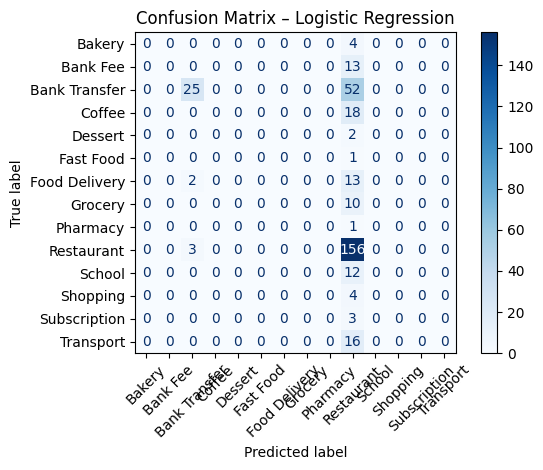

In [9]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

ConfusionMatrixDisplay(
    confusion_matrix=cm_lr,
    display_labels=le.classes_
).plot(cmap="Blues", xticks_rotation=45)

plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()


In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Classification Report
               precision    recall  f1-score   support

       Bakery       0.33      0.25      0.29         4
     Bank Fee       0.46      0.46      0.46        13
Bank Transfer       0.69      0.68      0.68        77
       Coffee       0.21      0.17      0.19        18
      Dessert       0.00      0.00      0.00         2
    Fast Food       0.00      0.00      0.00         1
Food Delivery       0.08      0.07      0.07        15
      Grocery       0.00      0.00      0.00        10
     Pharmacy       0.00      0.00      0.00         1
   Restaurant       0.70      0.75      0.72       159
       School       0.36      0.42      0.38        12
     Shopping       0.00      0.00      0.00         4
 Subscription       0.00      0.00      0.00         3
    Transport       0.22      0.25      0.24        16

     accuracy                           0.57       335
    macro avg       0.22      0.22      0.22       335
 weighted avg       0.55   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


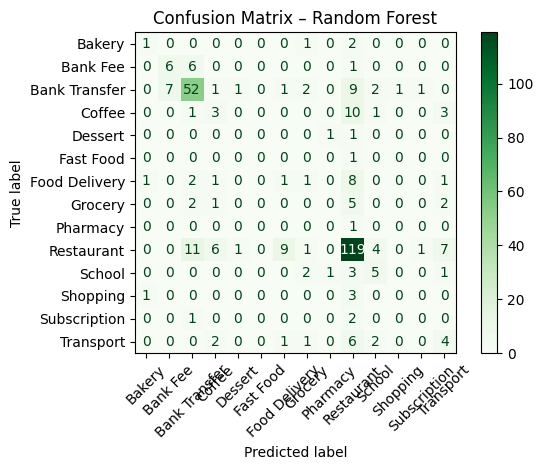

In [11]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(
    confusion_matrix=cm_rf,
    display_labels=le.classes_
).plot(cmap="Greens", xticks_rotation=45)

plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()


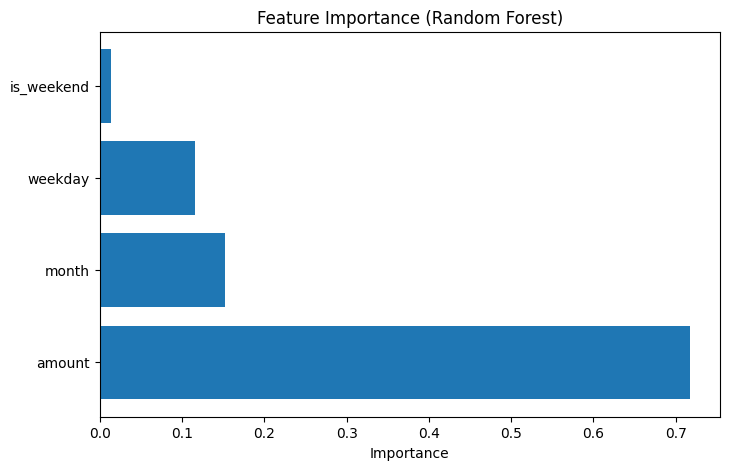

In [12]:
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [13]:
# amount, month, weekday, is_weekend
new_transaction = [[-120, 11, 2, 0]]

prediction = rf.predict(new_transaction)
predicted_category = le.inverse_transform(prediction)

print("Predicted Category:", predicted_category[0])


Predicted Category: Coffee


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
